<font color=blue> Привет еще раз. Спасибо, что доделала работу. Мои комментарии на этот раз выделены синим цветом.
    
---

---
## Комментарий от наставника

Привет, Алена! Спасибо, что прислала задание:) Поздравляю с приближением к концу первого модуля. Мои комментарии, как обычно, обозначены пометкой **Комментарий от наставника**. Пострайся учесть эти комментарии.

---

# Задание

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и нужно спланировать кампанию на 2017-й. 

# Шаг 1. Открыть файл с данными и изучить общую информацию

Импортируем библиотеку pandas, методом read_csv считаем файл с данными и сохраним в переменную data. Затем методом info изучим общую информацию о таблице, и методом head выведем ее первые 5 строк, чтобы наглядно увидеть, как устроены данные.

In [55]:
import pandas as pd
data = pd.read_csv("/datasets/games.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

## Вывод

В таблице 16715 строк с данными об играх до 2016 года. В каждой строке содержится информация об игре в 11 столбцах:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating есть пропуски (могли появиться в результате ошибок при сборе данных, или некоторые данные еще не были собраны или недоступны), которые, возможно, придется удалить или заменить на подходящее значение; значения в столбце Year_of_Release — год выпуска - следует привести к типу int, и т.д. Данные нуждаются в предобработке.

---
## Комментарий от наставника

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицу выполнен.

---

# Шаг 2. Подготовка данных

1) Заменим названия столбцов (приведем к нижнему регистру) с помощью методов columns и str.lowe()

In [56]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

2) Преобразуем данные в нужные типы. Посмотрим методом dtypes представленные типы данных.

In [57]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Значения в столбцах year_of_release (год выпуска) и critic_score (оценка критиков) - как видно из таблицы, целые числа, но представлены типом float. Приведем их к типу int методомами apply и astype (учитывая, что в данных есть пропуски)

In [58]:
data.loc[data['year_of_release'].notnull(), 'year_of_release'] = \
data.loc[data['year_of_release'].notnull(), 'year_of_release'].apply(int)
data['year_of_release'] = data['year_of_release'].astype('Int64')

data.loc[data['critic_score'].notnull(), 'critic_score'] = \
data.loc[data['critic_score'].notnull(), 'critic_score'].apply(int)
data['critic_score'] = data['critic_score'].astype('Int64')

data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score          object
rating              object
dtype: object

Посмотрим, почему столбец user_score — оценка пользователей - имеет тип object, напечатав уникальные значения этого столбца методом unique

In [59]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Дело в том, что есть записи 'tbd' (to be determined) - "будет объявлено дополнительно". Видимо, эти данные еще не были сформированы. Посмотрим, сколько таких записей.

In [60]:
data[data['user_score'] == 'tbd']['user_score'].count()

2424

Таких записей достаточно много, поэтому избавиться от них не получится. Но для удобства все-таки изменим тип данных в этом столбце на float64, а чтобы не потерять записи, в которых сейчас находится занчение 'tbd', запишем в них невозмодное значение '-1'

---
## Комментарий от наставника

Верно, по своей сути tbd является пропуском. Поэтому обработать таким значением возможно.  

---

In [61]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = '-1'

data.loc[data['user_score'].notnull(), 'user_score'] = \
data.loc[data['user_score'].notnull(), 'user_score'].apply(float)
data['user_score'] = data['user_score'].astype('float64')
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

3) Обработаем пропуски при необходимости. Проверим столбцы на пропуски сочетанием методов .isna().sum()

In [62]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропусков в столбце name всего 2, посмотрим на другие столбцы в таких строках

In [63]:
data[data['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN

Почти все данные в этих строках пустые, а значит не несут практически никакой информации, поэтому от них луше избавиться

In [64]:
data = data[~(data['name'].isna())]
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Пропуски в столбце year_of_release с годом выпуска нельзя заменить на среднее по столбцу или на иное значение. Но доля таких строк всего 269/16715 = 0.02, поэтому от них проще избавиться

In [65]:
data = data[~(data['year_of_release'].isna())]
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Пропуски в столбцах  critic_score, user_score, rating с оценками и рейтингом имеют в данном анализе принципиальное значение, поэтому их нельзя заменить на среднее по столбцу или на иное значение. При этом таких пропусков - половина от всех данных, поэтому и избавиться от них нельзя. Их мы оставим и учтем при дальнейшем анализе.

Пропуски в вышеперечисленных столбцах могли возникнуть при ошибке в сборе данных, отстутсвии необходимой информации или если какая-либо из игр не рассматиривалась критиками и в некоторых рейтингах.

---
## Комментарий от наставника

Да, лучше работать с меньшим количеством данных хорошего качества. Можно использовать индикаторные значения для заполнения пропущенных значений. Так мы просто пометим места пропусков. Главное помнить об этом и не использовать их в анализе.

---

4) Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец 'total_sales'

In [66]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'].head()

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

## Вывод

Названия столбцов приведены к нижнему регистру;
Данные приведены в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработаны пропуски
Посчитаны суммарные продажи во всех регионах

Данные готовы к дальнейшему анализу

# Шаг 3. Исследовательский анализ данных

1) Посмотрим, сколько игр выпускалось в разные годы, сгруппировав данную таблицу по годам и посчитав количество записей для каждого.

In [67]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Видно, что до 1993 года, включительно, игр выпускалось меньше 100 в год, тогда как далее сотни и даже более тысячи (пик в 2006 -2011 гг). Поэтому для анализа будут более показательными и важными игры выпущенные с 2012 по 2016,  когда количество выпущенных игр было ближе к современным реалиям. Наглядней покажет график зависимости количества выпущенных игр за год от года

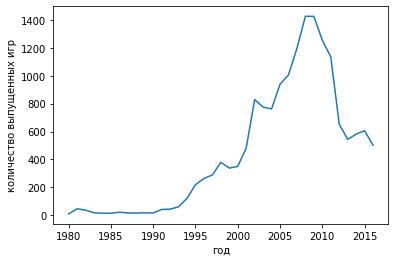

In [68]:
import matplotlib.pyplot as plt 
grouped_data = data.groupby('year_of_release')['name'].count()
plt.xlabel('год')
plt.ylabel('количество выпущенных игр')
plt.plot(grouped_data.index, grouped_data)

2) Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами (сгруппируем данные по платформам, посчитаем суммарные продажи и отсортируем в порядке убывания), а также построим по этим данным график.

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


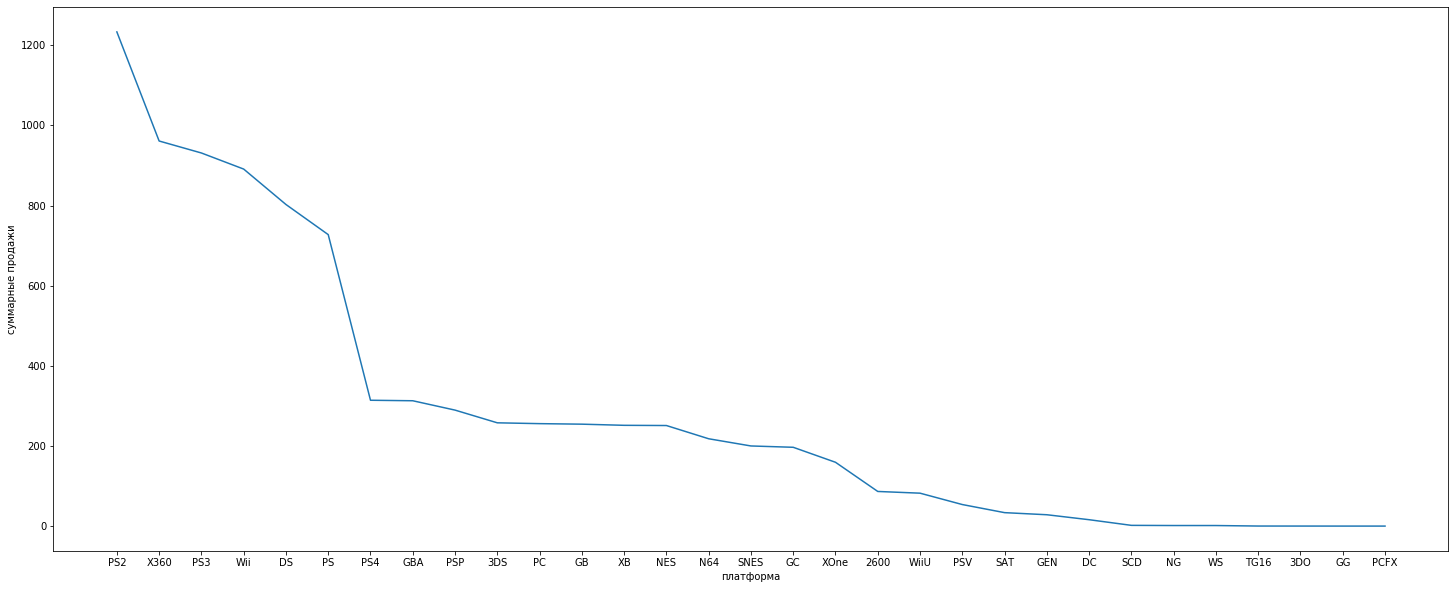

In [69]:
platform_data = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
print(platform_data)
plt.figure(figsize=(25,10))
plt.xlabel('платформа')
plt.ylabel('суммарные продажи')
plt.plot(platform_data.index, platform_data)

---
## Комментарий от наставника

Также лучше привести график. 

---

Выберем 4 платформы с наибольшими суммарными продажами - PS2, X360, PS3, Wii и построим распределение по годам. 


PS2


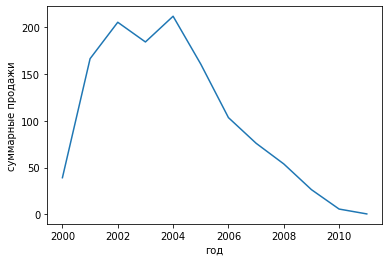


X360


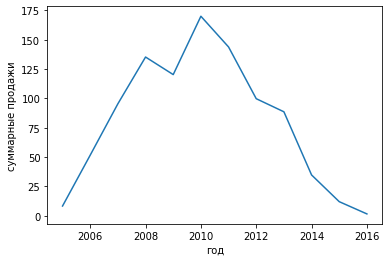


PS3


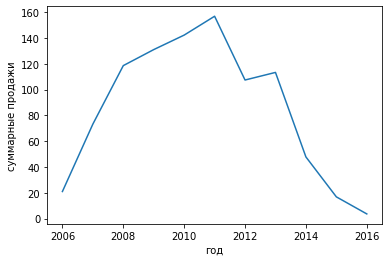


Wii


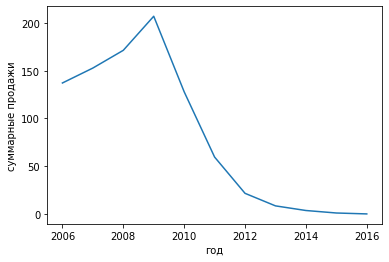

In [70]:
data_ps2 = [data[data['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum(), 'PS2']
data_x360 = [data[data['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum(), 'X360']
data_ps3 = [data[data['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum(), 'PS3']
data_wii = [data[data['platform'] == 'Wii'].groupby('year_of_release')['total_sales'].sum(), 'Wii']
for platform, name in (data_ps2, data_x360, data_ps3, data_wii):
    print()
    print(name)
    plt.xlabel('год')
    plt.ylabel('суммарные продажи')
    plt.plot(platform.index, platform)
    plt.show()

По графикам видно, что в среднем новые платформы появлятся, через ~4 года достинают пика суммарных продаж, и исчезают ~через 10 лет. Проверим это расчетами:

In [71]:
data_ps2 = [data[data['platform'] == 'PS2'], 'PS2']
data_x360 = [data[data['platform'] == 'X360'], 'X360']
data_ps3 = [data[data['platform'] == 'PS3'], 'PS3']
data_wii = [data[data['platform'] == 'Wii'], 'Wii']
summ = 0
for platform, name in (data_ps2, data_x360, data_ps3, data_wii):
    print()
    print(name)
    print('Продолжительность "жизни" платформы:', platform['year_of_release'].max() - platform['year_of_release'].min())
    summ += platform['year_of_release'].max() - platform['year_of_release'].min()
print('Средняя продолжительность "жизни" платформ:', summ/4)


PS2
Продолжительность "жизни" платформы: 11

X360
Продолжительность "жизни" платформы: 11

PS3
Продолжительность "жизни" платформы: 10

Wii
Продолжительность "жизни" платформы: 10
Средняя продолжительность "жизни" платформ: 10.5


Предварительная оценка подтвердилась: Средняя продолжительность "жизни" платформ: 10.5

---
## Комментарий от наставника

Верное значение по средней продолжительности существования платформы, можно подкрепить расчетами.

---

3) Возьмем данные за соответствующий актуальный период (2012 - 2016 гг). Выясним, какие платформы лидируют по продажам, растут или падают и выберем несколько потенциально прибыльных платформ.

---
## Комментарий от наставника

Выбран правильный актуальный год. Так в рассмотрение попадут только последние поколения платформ. 

---

In [72]:
data_actual = data[((data['year_of_release'] >= 2012) & (data['year_of_release'] <=2016))]
data_actual_grouped = data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
print(data_actual_grouped)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64


Мы выяснили, что платформы имеют свойство развиваться, достигать пика и исчезать, поэтому платформы, которые в данный момент лидируют по продажам не обязательно будут потенциально прибыльными, и наоборот. Для таких выводов нужно построить графики зависимости суммарных продаж от года для каждой платформы. (для объективности установим одинаковые границы по обеим осям для всех графиков командами plt.xlim, plt.ylim)


PS4


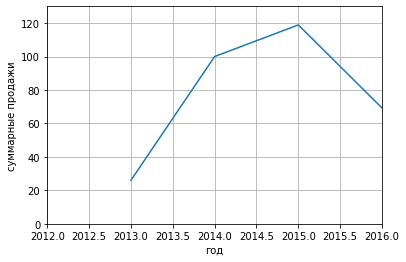


PS3


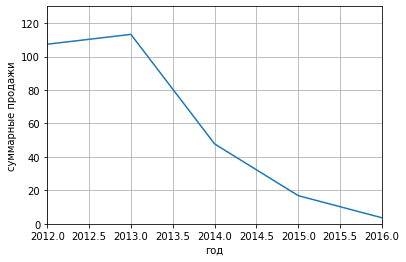


X360


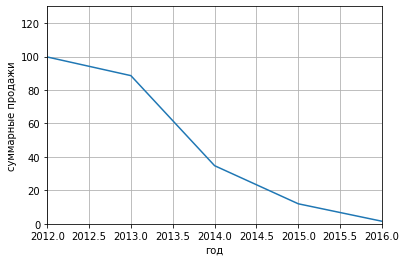


3DS


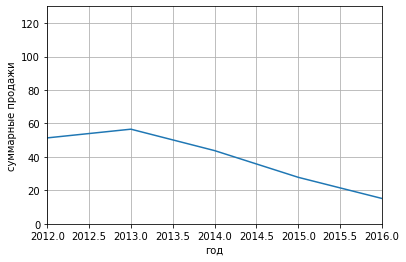


XOne


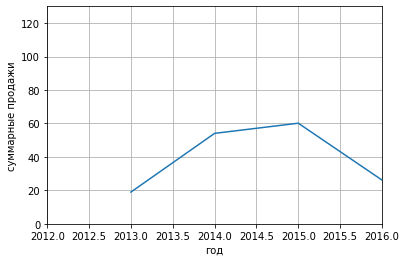


WiiU


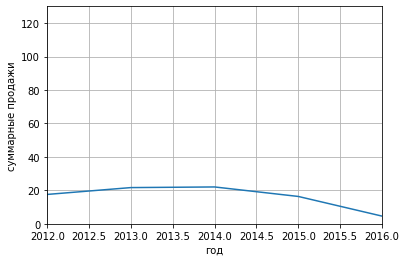


PC


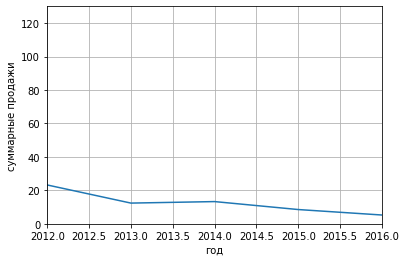


PSV


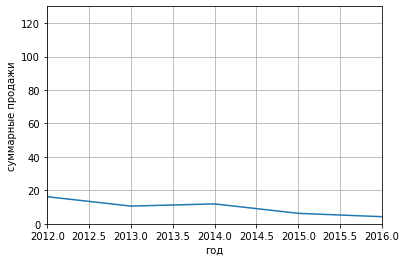


Wii


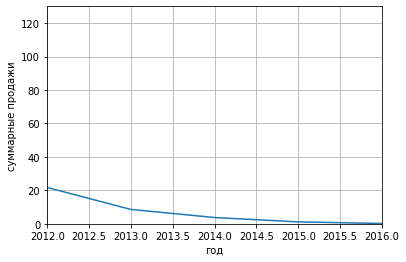


DS


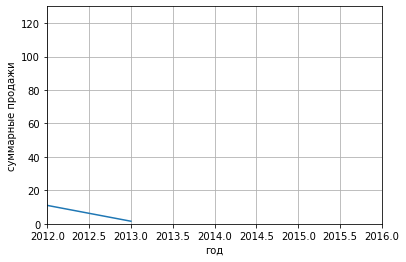


PSP


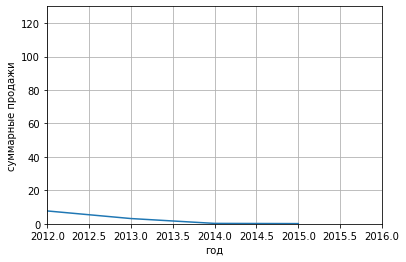

In [73]:
data_ps4 = [data_actual[data_actual['platform'] == 'PS4'].groupby('year_of_release')['total_sales'].sum(), 'PS4']
data_ps3 = [data_actual[data_actual['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum(), 'PS3']
data_x360 = [data_actual[data_actual['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum(), 'X360']
data_3ds = [data_actual[data_actual['platform'] == '3DS'].groupby('year_of_release')['total_sales'].sum(), '3DS']
data_xone = [data_actual[data_actual['platform'] == 'XOne'].groupby('year_of_release')['total_sales'].sum(), 'XOne']
data_wiiu = [data_actual[data_actual['platform'] == 'WiiU'].groupby('year_of_release')['total_sales'].sum(), 'WiiU']
data_pc = [data_actual[data_actual['platform'] == 'PC'].groupby('year_of_release')['total_sales'].sum(), 'PC']
data_psv = [data_actual[data_actual['platform'] == 'PSV'].groupby('year_of_release')['total_sales'].sum(), 'PSV']
data_wii = [data_actual[data_actual['platform'] == 'Wii'].groupby('year_of_release')['total_sales'].sum(), 'Wii']
data_ds = [data_actual[data_actual['platform'] == 'DS'].groupby('year_of_release')['total_sales'].sum(), 'DS']
data_psp = [data_actual[data_actual['platform'] == 'PSP'].groupby('year_of_release')['total_sales'].sum(), 'PSP']

for platform, name in (data_ps4, data_ps3, data_x360, data_3ds, data_xone, data_wiiu, 
                       data_pc, data_psv, data_wii, data_ds, data_psp):
    print()
    print(name)
    plt.xlim(2012, 2016)
    plt.ylim(0,130)
    plt.grid(True)
    plt.xlabel('год')
    plt.ylabel('суммарные продажи')
    plt.plot(platform.index, platform)
    plt.show()

Из графиков видно, что большинство платформ из этой выборки сейчас уже в стадии исчезания, или исчезли совсем, растущих нет, однакоу платформ PS4, 3DS, XOne спад только начался и суммарные продажи держатся на нормальном уровне. Таким образом, наиболее перспективная платформа на 2017 год - PS4, за ней - 3DS и XOne.

---
## Комментарий от наставника

Да, именно эти платформы мы и можем назвать перспективными на 2017 год. 

---

4) Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 

Глобальные продажи по играм


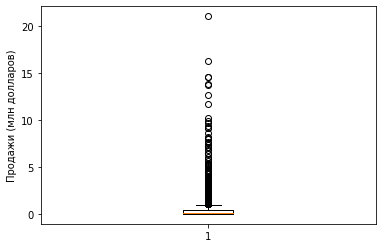

Глобальные продажи по платформам


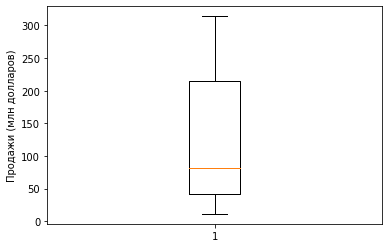

In [74]:
print("Глобальные продажи по играм")
plt.ylabel("Продажи (млн долларов)")
plt.boxplot(data_actual['total_sales'])
plt.show()

print("Глобальные продажи по платформам")
plt.ylabel("Продажи (млн долларов)")
plt.boxplot(data_actual.pivot_table(index = "platform", values = 'total_sales', aggfunc = 'sum')['total_sales'])
plt.show()

Если смотреть на первый график, то видно, что разброс в глобальных продажах по играм очень большой, в пределах "усов" находится очень мало значений, а значит глобальные продажи от игры к игре меняются очень сильно.
Однако на 2 графике ситуация совсем другая: здесь наоборот: все значения попали в пределы "усов", медиана близка к среднему, а значит здесь разброс не такой большой, ситуация более стабильная.

5) Посмотрим, как влияют на продажи внутри одной популярной и самой перспективной платформы  PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Отзвы пользователей

Диаграмма рассеяния


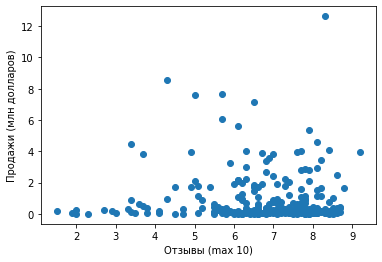

Корреляция между отзывами и продажами: -0.032


Отзвы критиков

Диаграмма рассеяния


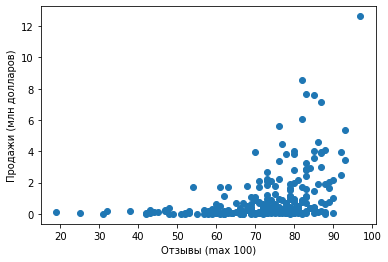

Корреляция между отзывами и продажами: 0.407




In [75]:
data_ps4 = data_actual[data_actual['platform'] == 'PS4']
print("Отзвы пользователей\n")
print("Диаграмма рассеяния")
plt.xlabel("Отзывы (max 10)")
plt.ylabel("Продажи (млн долларов)")
plt.scatter(data_ps4[data_ps4['user_score'] != -1]['user_score'], data_ps4[data_ps4['user_score'] != -1]['total_sales']) 
plt.show() 
print("Корреляция между отзывами и продажами: %.3f\n\n"%(data_ps4[data_ps4['user_score'] != -1]['user_score']\
                                                         .corr(data_ps4[data_ps4['user_score'] != -1]['total_sales'])))

print("Отзвы критиков\n")
print("Диаграмма рассеяния")
plt.xlabel("Отзывы (max 100)")
plt.ylabel("Продажи (млн долларов)")
plt.scatter(data_ps4['critic_score'], data_ps4['total_sales']) 
plt.show() 
print("Корреляция между отзывами и продажами: %.3f\n\n"%(data_ps4['critic_score'].apply(float).corr(data_ps4['total_sales'])))

Коэффициент корреляции между отзывами пользователей и продажами - всего -0.03, то есть зависимости нет. По графику рассеяния видно, что есть игры с максимальными оценками и маленькими продажами, и наоборот. Однако с отзывами критиков ситуация иная: коэффициент корреляции между ними и продажами 0.4, а значит зависимость, пускай и не сильная, прослеживается. Таким образом, отзывы критиков вызывают большее доверие и сильнее влияют на продажи, чем отзывы пользователей.

---
## Комментарий от наставника

Значения -1 в столбце с отзывами пользователей попадают в корреляционный анализ. Так быть не должно, это нереальные данные, которыми мы обработали пропуски. Исправь это. 

---

6) Соотнесем эти  выводы с продажами игр на других платформах. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и критиков  и продажами в целом.

Отзвы пользователей

Диаграмма рассеяния


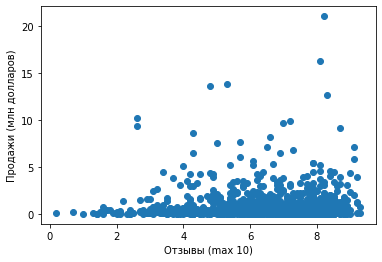

Корреляция между отзывами и продажами: 0.004


Отзвы критиков

Диаграмма рассеяния


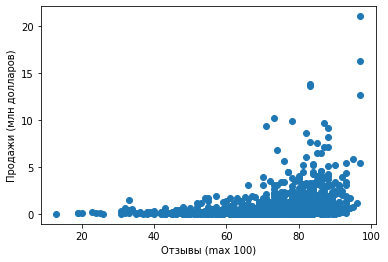

Корреляция между отзывами и продажами: 0.308




In [76]:
print("Отзвы пользователей\n")
print("Диаграмма рассеяния")
plt.xlabel("Отзывы (max 10)")
plt.ylabel("Продажи (млн долларов)")
plt.scatter(data_actual[data_actual['user_score'] != -1]['user_score'], 
            data_actual[data_actual['user_score'] != -1]['total_sales']) 
plt.show() 
print("Корреляция между отзывами и продажами: %.3f\n\n"%(data_actual[data_actual['user_score'] != -1]['user_score']\
                                                         .corr(data_actual[data_actual['user_score'] != -1]['total_sales'])))

print("Отзвы критиков\n")
print("Диаграмма рассеяния")
plt.xlabel("Отзывы (max 100)")
plt.ylabel("Продажи (млн долларов)")
plt.scatter(data_actual['critic_score'], data_actual['total_sales']) 
plt.show() 
print("Корреляция между отзывами и продажами: %.3f\n\n"%(data_actual['critic_score'].\
                                                         apply(float).corr(data_actual['total_sales'])))

И если смотреть по всем платформам целиком, то зависимость продаж от озывов пользователей еще меньше, и ависимость продаж от озывов критиков - также уменьшилась. Таким образом, нельзя точно говорить об объеме продаж только лишь по отзывам (как пользователей, так и критиков) нельзя.

<font color=blue> Теперь все сделано верно. Маркерные значения не попадают в анализ. 
    
---

---
## Комментарий от наставника

Результат немного смещен из-за значений -1 у пользователей. Здорово, что рассмотрены несколько платформ. Хорошо бы самые популярные рассмотреть по-отдельности. 

---

7) Посмотрим на общее распределение игр по жанрам. 

Распределение игр по жанрам: 


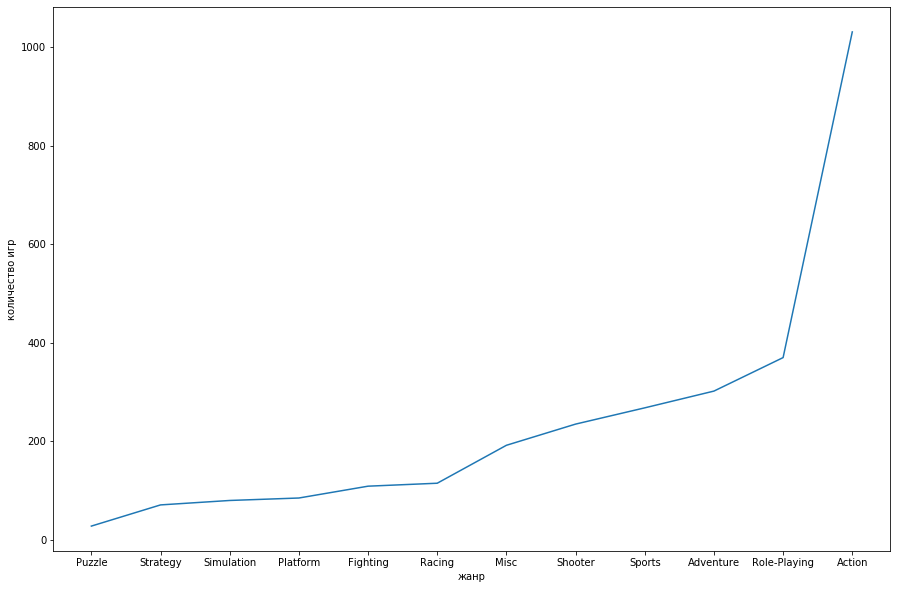

In [77]:
data_genre = data_actual.pivot_table(index = 'genre', values = 'name', aggfunc = 'count').sort_values('name')
print("Распределение игр по жанрам: ")
plt.figure(figsize=(15,10))
plt.xlabel("жанр")
plt.ylabel("количество игр")
plt.plot(data_genre.index, data_genre)
plt.show()

Итак, на оси абсцисс графика расположены жанры в порядке возрастания количества игр с таким жанром: меньше всего puzzle, strategy и simulation, больше всего - action, role-playing, adventure. Попробуем выделить жанры с наиболее высокими и низкими средними продажами.

Средние продажи по жанрам: 


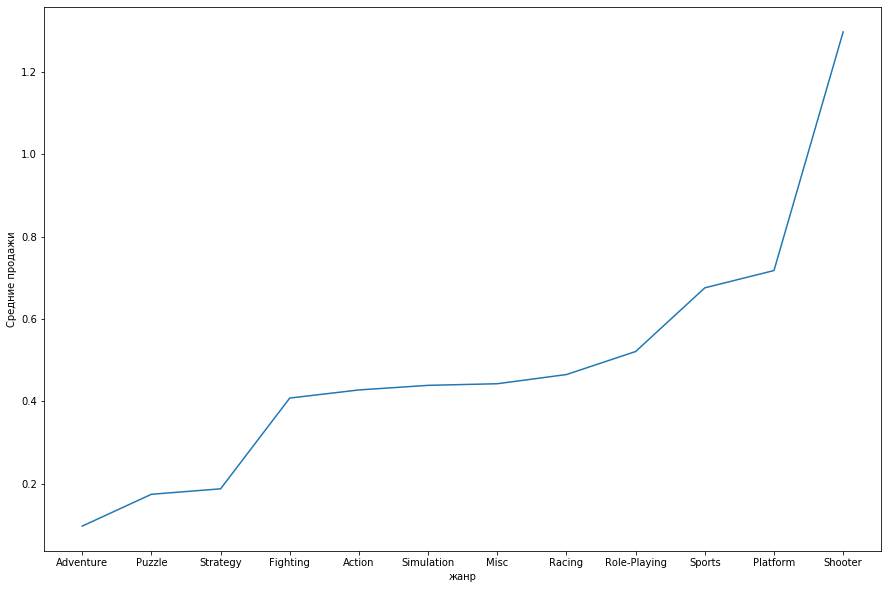

In [78]:
data_genre = data_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean').sort_values("total_sales")
print("Средние продажи по жанрам: ")
plt.figure(figsize=(15,10))
plt.xlabel("жанр")
plt.ylabel("Средние продажи")
plt.plot(data_genre.index, data_genre)
plt.show()

На оси абсцисс графика расположены жанры в порядке возрастания средних продаж: меньше всего у тех же puzzle и strategy, а также adventure, хотя по количеству игр последний был в топ-3. Больше всего продаж у жанров sports, platform, shooter. Попробуем выделить жанры с наиболее высокими и низкими средними продажами. Таким обрахом, явно выделяются жанры с высокими и низкими продажами, а значит на основе этой статистики можно планировать кампанию на 2017 год.

## Вывод

Во-первых, был определен актуальный период, на основе которого можно делать прогнозы на следующий год: 2012-2016гг,  когда количество выпущенных игр было ближе к современным реалиям.

Во-вторых, мы выяснили, что в общем случае новые платформы появляются, через ~4 года достинают пика суммарных продаж, и исчезают ~через 10 лет

В-третьих, установлено, что большинство платформ сейчас уже в стадии исчезания, или исчезли совсем, растущих нет, а наиболее перспективная платформа на 2017 год - PS4, за ней - 3DS и XOne.

В-четвертых, стало яно, что разброс в глобальных продажах по играм очень большой, а по плаьформам - наоборот, нет резко выбивающихся значений, ситуация более стабильная.

В-пятых, мы выяснили, что отзывы пользователей и критиков слабо влияют на суммарные продажи (хотя отзывы критиков - больше, чем пользователей).

В-шестых, установлено, что количество игр в каком-либо жанре не влияет на среднее общих продаж в этом жанре, а жанры, которые приносят натбольшее количество денег с продаж - sports, platform и shooter, однако и их производство обходится сильно дороже, чем производство Puzzle-игр.

---
## Комментарий от наставника

Правильно, но не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

---

# Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

1) Самые популярные платформы (топ-5). 

Самые популярные платформы (топ-5 по суммарным продажам) в Северной Америке
          na_sales
platform          
X360        140.05
PS4         108.74
PS3         103.38
XOne         93.12
3DS          55.31


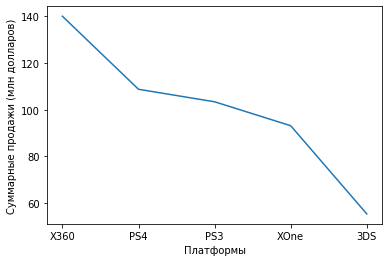


Самые популярные платформы (топ-5 по суммарным продажам) в Европе
          eu_sales
platform          
PS4         141.09
PS3         106.86
X360         74.52
XOne         51.59
3DS          42.64


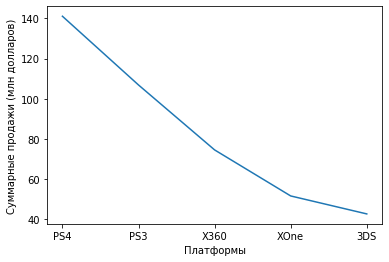


Самые популярные платформы (топ-5 по суммарным продажам) в Японии
          jp_sales
platform          
3DS          87.79
PS3          35.29
PSV          21.04
PS4          15.96
WiiU         13.01


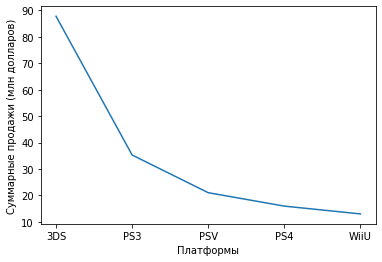


Самые популярные платформы (топ-5 по суммарным продажам) в мире
          total_sales
platform             
PS4            314.14
PS3            288.79
X360           236.54
3DS            194.61
XOne           159.32


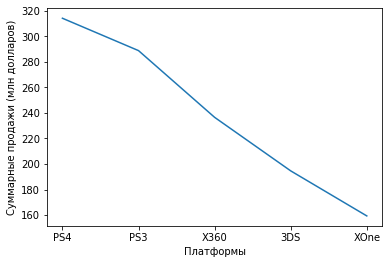

In [79]:
data_na = data_actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')\
.sort_values('na_sales', ascending = False)
print("Самые популярные платформы (топ-5 по суммарным продажам) в Северной Америке")
print(data_na.head())

plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи (млн долларов)")
plt.plot(data_na.head().index, data_na.head())
plt.show()
print()

data_eu = data_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')\
.sort_values('eu_sales', ascending = False)
print("Самые популярные платформы (топ-5 по суммарным продажам) в Европе")
print(data_eu.head())

plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи (млн долларов)")
plt.plot(data_eu.head().index, data_eu.head())
plt.show()
print()

data_jp = data_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')\
.sort_values('jp_sales', ascending = False)
print("Самые популярные платформы (топ-5 по суммарным продажам) в Японии")
print(data_jp.head())

plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи (млн долларов)")
plt.plot(data_jp.head().index, data_jp.head())
plt.show()
print()

data_total = data_actual.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.sort_values('total_sales', ascending = False)
print("Самые популярные платформы (топ-5 по суммарным продажам) в мире")
print(data_total.head())

plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи (млн долларов)")
plt.plot(data_total.head().index, data_total.head())
plt.show()
print()

Выявлена следующая закономерность: топ-5 в Европе и Северной Америке повторяют друг-друга и общий топ-5, разве что платформы-лидеры меняются местами. Оно и понятно: в этих регионах живет большинство населения, играющих в компьютерные игры, и именно они в основном формируют общий топ,  да и взаимосвязь между этими регионами достаточно сильна. А в топ-5 по Японии выделяются 2 отличающиеся платформы - PSV  и Wiiu, и жто тоже довольно ожидаемо: они были созданы как раз в Японии.

2) Самые популярные жанры (топ-5).

Самые популярные жанры (топ-5 по суммарным продажам) в Северной Америке
              na_sales
genre                 
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19


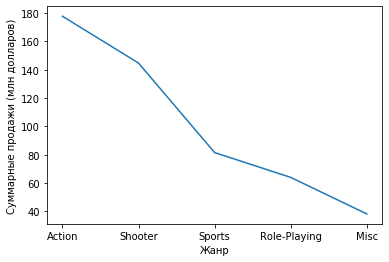


Самые популярные жанры (топ-5 по суммарным продажам) в Европе
              eu_sales
genre                 
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29


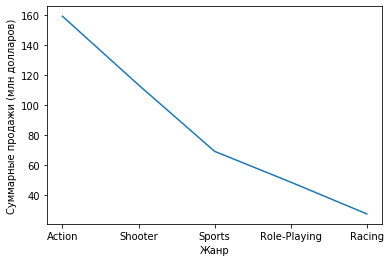


Самые популярные жанры (топ-5 по суммарным продажам) в Японии
              jp_sales
genre                 
Role-Playing     65.44
Action           52.80
Misc             12.86
Simulation       10.41
Fighting          9.44


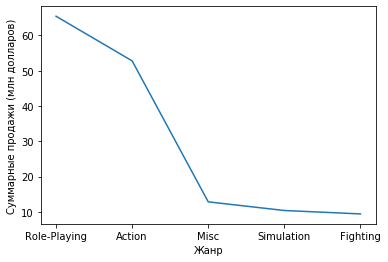


Самые популярные жанры (топ-5 по суммарным продажам) в мире
              total_sales
genre                    
Action             441.12
Shooter            304.73
Role-Playing       192.80
Sports             181.07
Misc                85.04


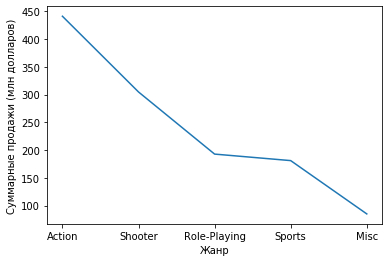

In [80]:
data_na = data_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')\
.sort_values('na_sales', ascending = False)
print("Самые популярные жанры (топ-5 по суммарным продажам) в Северной Америке")
print(data_na.head())

plt.xlabel("Жанр")
plt.ylabel("Суммарные продажи (млн долларов)")
plt.plot(data_na.head().index, data_na.head())
plt.show()
print()

data_eu = data_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')\
.sort_values('eu_sales', ascending = False)
print("Самые популярные жанры (топ-5 по суммарным продажам) в Европе")
print(data_eu.head())

plt.xlabel("Жанр")
plt.ylabel("Суммарные продажи (млн долларов)")
plt.plot(data_eu.head().index, data_eu.head())
plt.show()
print()

data_jp = data_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')\
.sort_values('jp_sales', ascending = False)
print("Самые популярные жанры (топ-5 по суммарным продажам) в Японии")
print(data_jp.head())

plt.xlabel("Жанр")
plt.ylabel("Суммарные продажи (млн долларов)")
plt.plot(data_jp.head().index, data_jp.head())
plt.show()
print()

data_total = data_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')\
.sort_values('total_sales', ascending = False)
print("Самые популярные жанры (топ-5 по суммарным продажам) в мире")
print(data_total.head())

plt.xlabel("Жанр")
plt.ylabel("Суммарные продажи (млн долларов)")
plt.plot(data_total.head().index, data_total.head())
plt.show()
print()


Вновь выявлена похожая закономерность: топ-5 в Европе и Северной Америке повторяют друг-друга и общий топ-5, разве что платформы-лидеры меняются местами. Причины те же. А в топ-5 по Японии выделяются 2 отличающихся жанра - Simulation и Fighting, что , вероятно, обусловлено образом жизни и менталитетом японцев.

3) Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Северная Америка

График зависисмости


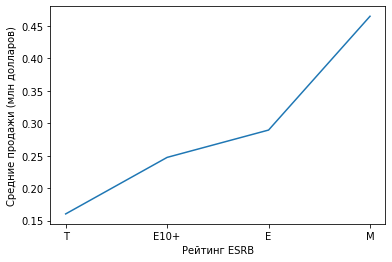

Европа

График зависисмости


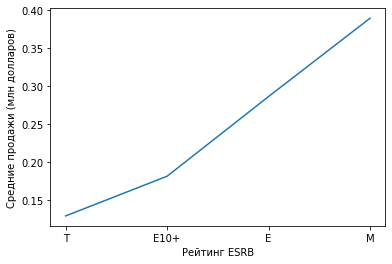

Япония

График зависисмости


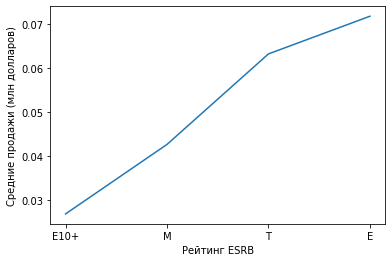

In [81]:
data_na = data_actual.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'mean')\
.sort_values('na_sales', ascending = True)

print("Северная Америка\n")
print("График зависисмости")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Средние продажи (млн долларов)")
plt.plot(data_na.index, data_na)
plt.show() 

data_eu = data_actual.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'mean')\
.sort_values('eu_sales', ascending = True)

print("Европа\n")
print("График зависисмости")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Средние продажи (млн долларов)")
plt.plot(data_eu.index, data_eu)
plt.show() 

data_jp = data_actual.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'mean')\
.sort_values('jp_sales', ascending = True)

print("Япония\n")
print("График зависисмости")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Средние продажи (млн долларов)")
plt.plot(data_jp.index, data_jp)
plt.show() 

Примечание:

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови.

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

Вновь графики по Севереной Америке и Европе по тем же причинам схожи: средние продажи возрастают при изменении рейтинга в следующем порядке: T, E10+, E, M. А в Европе порядок другой: E10+, M, T, E, то есть там наибольшие продажи по играм "Для всех", которые не содержат насилия и непристойных сцен, что вновь обусловлено их менталитетом и тем, кто в этой игре является наиболее р=активным пользователем игр.

## Вывод

Итак, можно составить портрет пользователя каждого региона:

Северная Америка: вероятнее всего пользуется платформами X360, PS4, PS3, XOne, 3DS; предпочитает жанры Action, Shooter, Sports, Role-Playing, Misc;  чаще покупает игры с рейтингом E, M, реже - T, E10+.

Европа: вероятнее всего пользуется платформами PS4, PS3, X360,  XOne, 3DS; предпочитает жанры Action, Shooter, Sports, Role-Playing, Racing;  чаще покупает игры с рейтингом E, M, реже - T, E10+.

Япония: вероятнее всего пользуется платформами 3DS, PS3, PSV, PS4, WiiU; предпочитает жанры Role-Playing, Action, Misc, Simulation, Fightning;  чаще покупает игры с рейтингом E, T, реже - M, E10+.

В целом, пользователи в Северной Америке и Европе схожи по предпостениям, и в осносном именно они формируют общий рынок. Пользователи из Японии отличаются по своим предпочтениям в силу другого менталитета и образа жизни, а также имеют локально созданные платформы.

---
## Комментарий от наставника

Портрет типичного пользователя каждого из регионов получен. Стоит визуализировать все полученные таблицы. Здорово, что отмечены индивидуальные особенности каждого региона. 

---

# Шаг 5. Проверим гипотезы.

Зададим пороговое значение alpha 5 %

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H₀ всегда формулируется так, чтобы использовать знак равенства (чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти). Поэтому в первом случае нулевая гипотеза Н0:

"Средние пользовательские рейтинги платформ Xbox One и PC не различаются"

Так как мы выяснили, что пользовательские рейтниги практически не влияют на продажи, то будем лишь выяснять, отличаются ли они между платформами и потому альтернативную гипотезу сформулируем так Н1:

"Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые"

(гипотеза двусторонняя, поэтому pvalue не будем делить на 2, и не будем использовать дополнительное сравнение при решении об отвержении нулевой гипотезы)

Так как мы имеем дынные о выборке (только актуальные года), то чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var) .

Так как выборки взяты из схожих по параметрам совокупностей, дисперсия каждой выборки нужно оцененивать по объединённому датасету из двух выборок, а не для каждой по отдельности по значениям в ней самой (equal_var = True по умолчанию).


In [82]:
from scipy import stats as st

alpha = 0.05

data_xbox = data_actual[((data_actual['platform'] == 'XOne')
                  & (~(data_actual['user_score'].isna()))
                  & (data_actual['user_score'] != -1))]
data_pc = data_actual[((data_actual['platform'] == 'PC') & 
                (~(data_actual['user_score'].isna())) & 
                (data_actual['user_score'] != -1))]

results = st.ttest_ind(
    data_xbox['user_score'], 
    data_pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC различаются, но такое различие можно получить случайно с вероятностью в 55%. Это слишком большая вероятность, поэтому нулевую гипотезу не отвергаем: вполне возможно, что средние пользовательские рейтинги платформ Xbox One и PC не различаются

---
## Комментарий от наставника

Гипотезы сформулированы и проверены верно. Хорошо, что значения -1 не входят в финальные выборки. 

---

Аналогично поступаем со второй гипотезой:

2) Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1: Средние пользовательские рейтинги жанров Action и Sports  разные.

In [83]:
data_action = data_actual[((data_actual['genre'] == 'Action')
                           & (~(data_actual['user_score'].isna()))
                           & (data_actual['user_score'] != -1))]
data_sports = data_actual[((data_actual['genre'] == 'Sports')
                           & (~(data_actual['user_score'].isna()))
                           & (data_actual['user_score'] != -1))]

results = st.ttest_ind(
    data_action['user_score'], 
    data_sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские рейтинги жанров Action и Sports различаются, и такое различие можно получить случайно с очень маленькой вероятностью. Это явно слишком малая вероятность, чтобы делать вывод о равенстве средней прибыли. Поэтому нулевую гипотезу отвергаем: нельзя сказать, что средние пользовательские рейтинги жанров Action и Sports одинаковые, а альтернативную (равную данной в начале) оставляем

## Вывод

Первая гипотеза имеет место быть: вполне возможно, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
И вторую гипотезу тоже нельзя отвергнуть (мы отказались от нулевой, которая противоречит данной в задании): средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта»), скорее всего, разные.

---
## Комментарий от наставника

Вторая гипотеза также проверена верно. 

---

# Шаг 6. Общий вывод

Был проведен исследовательский анализ данных, в результате которого получены следующие выводы: 

1) большинство платформ сейчас уже в стадии исчезания, или исчезли совсем, растущих нет, а наиболее перспективная платформа на 2017 год - PS4, за ней - 3DS и XOne.

2) разброс в глобальных продажах по играм очень большой, а по платформам - наоборот, нет резко выбивающихся значений, ситуация более стабильная.

3) отзывы пользователей и критиков слабо влияют на суммарные продажи (хотя отзывы критиков - больше, чем пользователей).

4) количество игр в каком-либо жанре не влияет на среднее общих продаж в этом жанре, а наиболее прибыльные - sports, platform и shooter.

Был составлен портрет пользователя каждого региона:

* Северная Америка: вероятнее всего пользуется платформами X360, PS4, PS3, XOne, 3DS; предпочитает жанры Action, Shooter, Sports, Role-Playing, Misc; чаще покупает игры с рейтингом E, M, реже - T, E10+.

* Европа: вероятнее всего пользуется платформами PS4, PS3, X360, XOne, 3DS; предпочитает жанры Action, Shooter, Sports, Role-Playing, Racing; чаще покупает игры с рейтингом E, M, реже - T, E10+.

* Япония: вероятнее всего пользуется платформами 3DS, PS3, PSV, PS4, WiiU; предпочитает жанры Role-Playing, Action, Misc, Simulation, Fightning; чаще покупает игры с рейтингом E, T, реже - M, E10+.

Также выяснилось, что, в целом, пользователи в Северной Америке и Европе схожи по предпочтениям, и в осносном именно они формируют общий рынок. Пользователи из Японии отличаются по своим предпочтениям в силу другого менталитета и образа жизни, а также имеют локально созданные платформы.

Подтвердили свое право на существование 2 гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Таким образом, выявлены определяющие успешность игры закономерности, и можно сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год:

* Для разных регионов нужно планировать разные кампании на основе вышеперечисленных предпочтений (наиболее важные регионы - Северная Америка и Европа)

* Наиболее перспективная платформа - PS4, за ней - 3DS и XOne 

* Для каждой из этих платформ также нужно разработать особый подход

* При выборе игр не следует полностью ориентироваться на отзывы пользователей или критиков, важнее - жанр(Action, Shooter, Sport) , платформа (X360, PS4, PS3)  и рейтинг (E, M)

---
## Комментарий от наставника

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод. 

---

<font color=blue> Помарка исправлена, и теперь работа выполнена хорошо. Успехов в дальнейших проектах :)
    
---

## Комментарий от наставника

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделала большую работу, молодец! Работа выполнена хорошо. Осталось только убрать маркерные значения из корреляционного анализа. Проводить анализ с ними мы не можем, происходит смещение результатов. Жду твою работу :)

-----